### **Step 1: Import Libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Step 2: Load the Dataset**

In [4]:
# Load the dataset
df = pd.read_csv('./datasets/netflix_titles.csv')

# Display the first few rows of the dataframe
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### **Step 3: Data Cleaning**

In [4]:
# Check for missing values
df.isnull().sum()

# Fill or drop missing values based on the analysis
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)
df['genre'] = df['listed_in'].str.split(', ').str[0]

### **Step 4: Distribution of Movies vs. TV Shows**

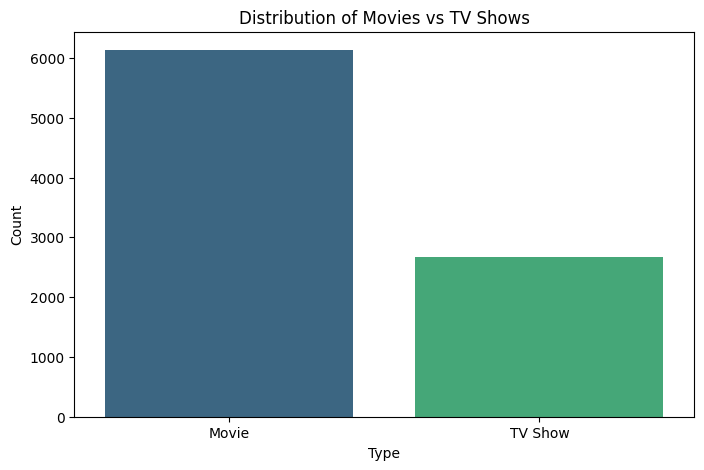

In [10]:
# Distribution of Movies vs TV Shows
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='type', hue='type', palette='viridis')
plt.title('Distribution of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

### **Step 5: Countries Producing the Most Content**

C:\Users\Azam\AppData\Local\Temp\ipykernel_19284\2985347178.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_data.index,  y=country_data.values, palette='viridis')


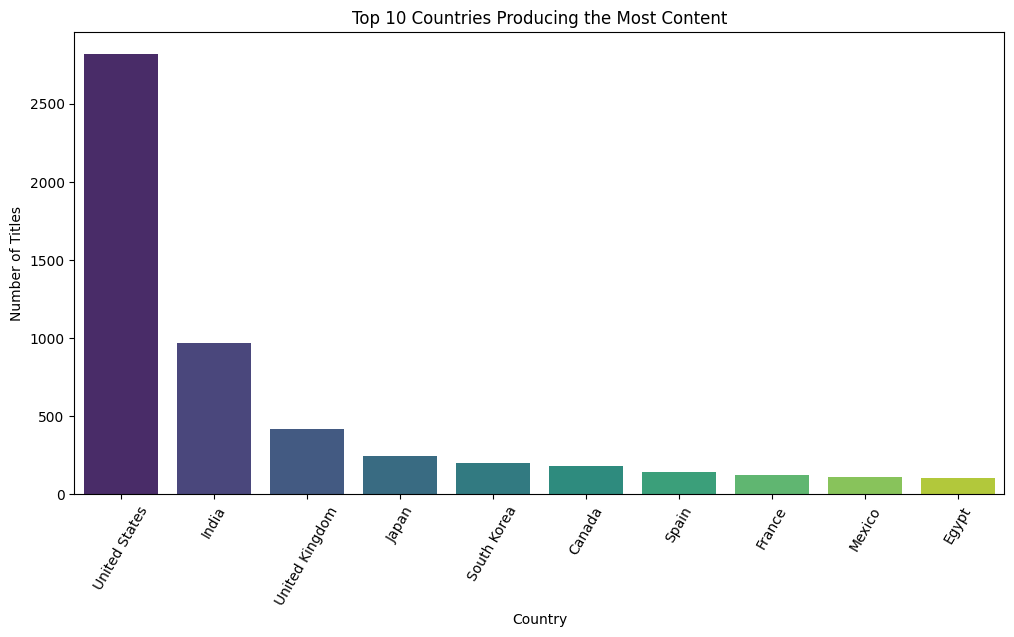

In [9]:
# Count the number of titles by country
country_data = df['country'].value_counts().head(10)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=country_data.index,  y=country_data.values, palette='viridis')
plt.title('Top 10 Countries Producing the Most Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=60)
plt.show()

### **Step 6: Trend of Releases Over the Years**

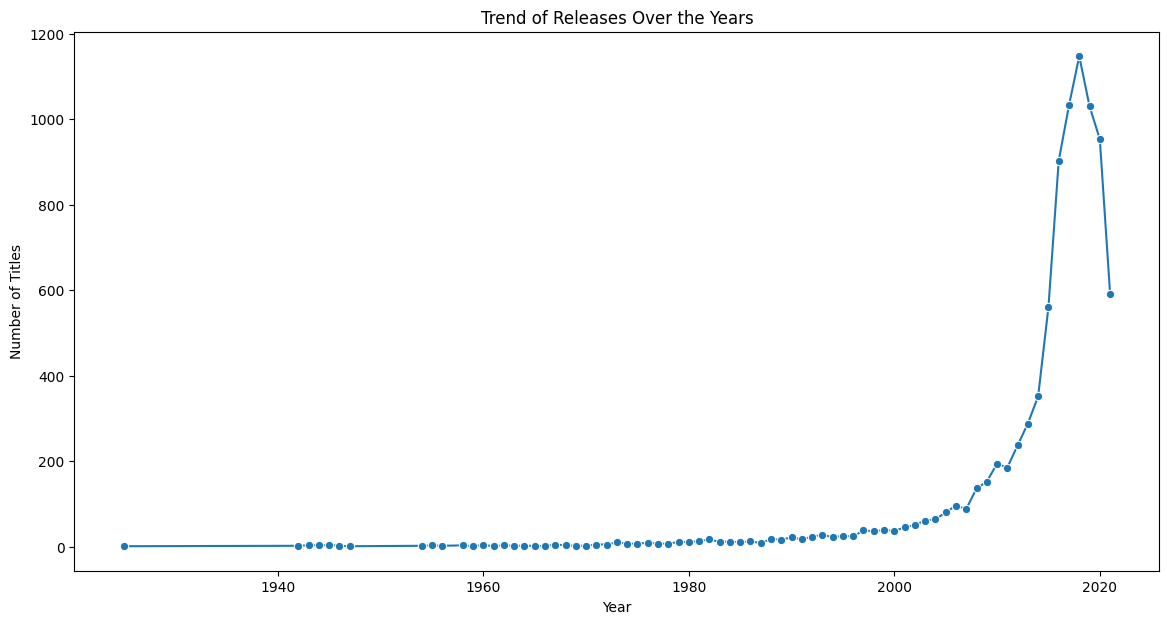

In [17]:
# Convert the release year to datetime
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')

# Count the number of releases per year
year_data = df['release_year'].dt.year.value_counts().sort_index()

# Plot the data
plt.figure(figsize=(14, 7))
sns.lineplot(x=year_data.index, y=year_data.values, marker='o')
plt.title('Trend of Releases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

### **Step 7: Most Common Genres**

C:\Users\Azam\AppData\Local\Temp\ipykernel_14944\1737616117.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_data.index, y=genre_data.values, palette='viridis')


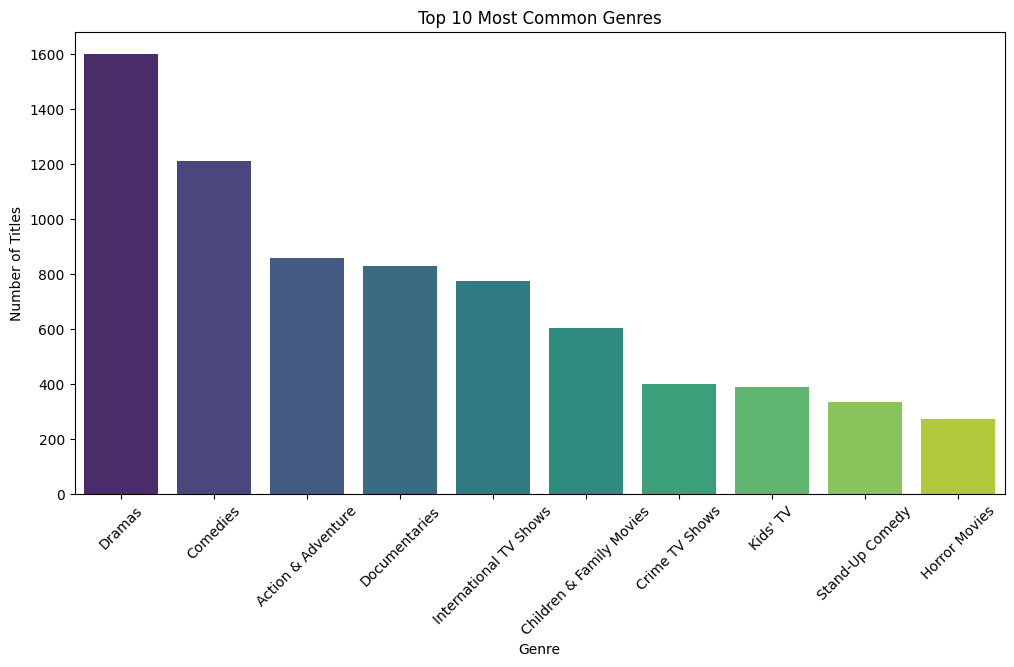

In [18]:
# Count the most common genres
genre_data = df['genre'].value_counts().head(10)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_data.index, y=genre_data.values, palette='viridis')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

### **Step 8: Rating Distribution Across Genres**

C:\Users\Azam\AppData\Local\Temp\ipykernel_14944\3194092585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rating', y='genre', palette='viridis')


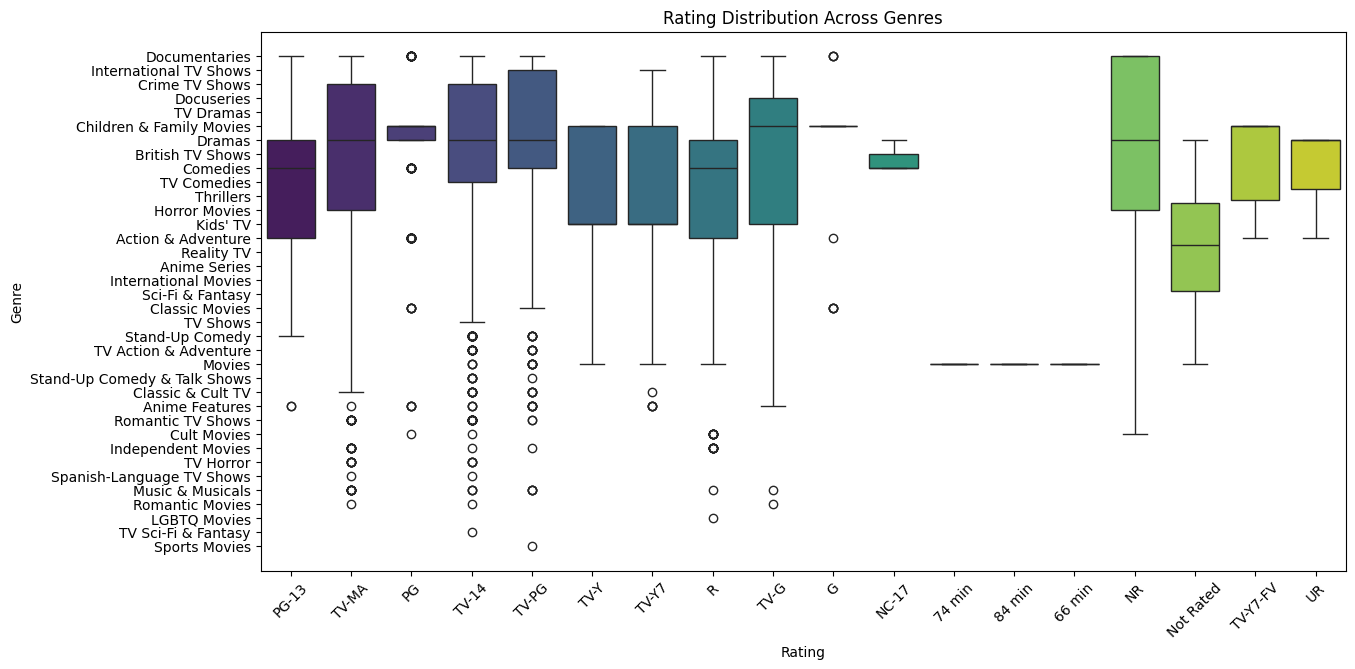

In [19]:
# Plot rating distribution across genres
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='rating', y='genre', palette='viridis')
plt.title('Rating Distribution Across Genres')
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.show()